# Ayiti Analytics capstone project

## Exploring Background of different professional in Haiti from LinkedIn

#### Data acquisition

##### Scrapping LinkedIn to find link profile of different people in Haiti

In [2]:
# Load libraries
import requests
import re
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
import time
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [14]:
# Create values Selenium
USERNAME = "chosson.jeanfranco@gmail.com" 
PASSWORD =  "**********************"
linkedin = 'https://www.linkedin.com'

In [15]:
# Open Selenium
browser = webdriver.Chrome()
browser.get(linkedin)
time.sleep(3)
# Identify email and password inputs and enter in information
email = browser.find_element_by_name('session_key')
password = browser.find_element_by_name('session_password')
email.send_keys(USERNAME + Keys.RETURN)
password.send_keys(PASSWORD + Keys.RETURN)
time.sleep(3)

##  Step 1

I want to build a data set of at least one thousand profiles. 

LinkedIn puts restrictions on its page to prevent scrapping. 


When you use the LinkedIn filter to search, if you search for people and filter by a specific country, you can get 100 pages with less than 11 people per page. it can be 10 or 5 people per page. 
In order to build my dataset, i will scrape linkedIn by searching for people and filter one by one for Haiti, some universities in Haiti, some companies in Haiti.

In [ ]:
# Go to search page and scroll to the bottom of the page to load elements of the page
search = "https://www.linkedin.com/search/results/people/?facetGeoRegion=%5B%22ht%3A0%22%5D&origin=FACETED_SEARCH"
browser.get(search)
time.sleep(3)
browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
current_url = 'url_placeholder' # this is a placeholder for the URL check
# Create empty dataframe
df = pd.DataFrame(columns = ['name', 'title', 'location', 'profile'])

debut_url = 'https://www.linkedin.com/search/results/people/?keywords=haiti&origin=SWITCH_SEARCH_VERTICAL&page='

for i in range(100):
    Final_url = debut_url + str(i)
    browser.get(Final_url)
    time.sleep(3)
    
    page = BeautifulSoup(browser.page_source, 'lxml')
    page_names = page.find_all('span', class_ = 'actor-name')
    page_titles = page.find_all('p', class_ = 'subline-level-1')
    page_locations = page.find_all('p', class_ = 'subline-level-2')
    page_profiles = page.find_all('a', class_ = 'search-result__result-link')
    
    # Put scraped data into a dataframe
    names = list(map(lambda x: x.text, page_names))
    titles = list(map(lambda x: x.text.replace('\n', ''), page_titles))
    locations = list(map(lambda x: x.text.replace('\n', ''), page_locations))
    profiles = list(map(lambda x: linkedin + x['href'], page_profiles))[::2]
    temp = pd.DataFrame({'name':names, 'title':titles, 'location':locations, 'profile':profiles})
    
    # Filter out members who do not provide information
    temp = temp[temp['name'] != 'LinkedIn Member']
    if temp.shape[0]<10:
        print(len(temp))
    # Append new data to df
    df = df.append(temp)
    
     # Stop appending if the number of retrieved records exceeds the limit
    if df.shape[0] >= 1000:
        break
    time.sleep(3)
        
# Reset dataframe index
df.reset_index()

# Export results
#df.to_csv("output_search.csv", index = False)

# Close Selenium
browser.quit()

In [19]:
# Create values Selenium
USERNAME = "chosson.jeanfranco@gmail.com" 
PASSWORD =  "**********************"
linkedin = 'https://www.linkedin.com'
# Open Selenium
browser = webdriver.Chrome()
browser.get(linkedin)
time.sleep(3)
# Identify email and password inputs and enter in information
email = browser.find_element_by_name('session_key')
password = browser.find_element_by_name('session_password')
email.send_keys(USERNAME + Keys.RETURN)
password.send_keys(PASSWORD + Keys.RETURN)
# Go to profile page and scroll to the bottom of the page to load elements of the page
time.sleep(3)
search = "https://www.linkedin.com/search/results/people/?facetSchool=%5B%22162070%22%2C%225097000%22%5D&origin=FACETED_SEARCH"
browser.get(search)
time.sleep(3)
browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
current_url = 'url_placeholder' # this is a placeholder for the URL check
# Create empty dataframe
df = pd.DataFrame(columns = ['name', 'title', 'location', 'profile'])

debut_url = 'https://www.linkedin.com/search/results/people/?facetSchool=%5B%22162070%22%2C%225097000%22%5D&origin=FACETED_SEARCH&page='

for i in range(100):
    Final_url = debut_url + str(i)
    browser.get(Final_url)
    time.sleep(3)
    
    page = BeautifulSoup(browser.page_source, 'lxml')
    page_names = page.find_all('span', class_ = 'actor-name')
    page_titles = page.find_all('p', class_ = 'subline-level-1')
    page_locations = page.find_all('p', class_ = 'subline-level-2')
    page_profiles = page.find_all('a', class_ = 'search-result__result-link')
    
    # Put scraped data into a dataframe
    names = list(map(lambda x: x.text, page_names))
    titles = list(map(lambda x: x.text.replace('\n', ''), page_titles))
    locations = list(map(lambda x: x.text.replace('\n', ''), page_locations))
    profiles = list(map(lambda x: linkedin + x['href'], page_profiles))[::2]
    temp = pd.DataFrame({'name':names, 'title':titles, 'location':locations, 'profile':profiles})
    
    # Filter out members who do not provide information
    temp = temp[temp['name'] != 'LinkedIn Member']
    
    # Append new data to df
    df = df.append(temp)
    
     # Stop appending if the number of retrieved records exceeds the limit
    if df.shape[0] >= 1000:
        break
    time.sleep(3)
        
# Reset dataframe index
df.reset_index()

# Export results
df.to_csv("output_search1.csv", index = False)

# Close Selenium
browser.quit()

In [22]:
# Create values Selenium
USERNAME = "chosson.jeanfranco@gmail.com" 
PASSWORD =  "*************************"
linkedin = 'https://www.linkedin.com'
# Open Selenium
browser = webdriver.Chrome()
browser.get(linkedin)
time.sleep(3)
# Identify email and password inputs and enter in information
email = browser.find_element_by_name('session_key')
password = browser.find_element_by_name('session_password')
email.send_keys(USERNAME + Keys.RETURN)
password.send_keys(PASSWORD + Keys.RETURN)
# Go to profile page and scroll to the bottom of the page to load elements of the page
time.sleep(3)

search = "https://www.linkedin.com/search/results/people/?facetPastCompany=%5B%22163457%22%2C%22767299%22%2C%225654%22%2C%221860%22%2C%221964533%22%5D&origin=FACETED_SEARCH"
browser.get(search)
time.sleep(3)
browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
current_url = 'url_placeholder' # this is a placeholder for the URL check
# Create empty dataframe
df = pd.DataFrame(columns = ['name', 'title', 'location', 'profile'])

debut_url = 'https://www.linkedin.com/search/results/people/?facetPastCompany=%5B%22163457%22%2C%22767299%22%2C%225654%22%2C%221860%22%2C%221964533%22%5D&origin=FACETED_SEARCH&page='

for i in range(100):
    Final_url = debut_url + str(i)
    browser.get(Final_url)
    time.sleep(3)
    
    page = BeautifulSoup(browser.page_source, 'lxml')
    page_names = page.find_all('span', class_ = 'actor-name')
    page_titles = page.find_all('p', class_ = 'subline-level-1')
    page_locations = page.find_all('p', class_ = 'subline-level-2')
    page_profiles = page.find_all('a', class_ = 'search-result__result-link')
    
    # Put scraped data into a dataframe
    names = list(map(lambda x: x.text, page_names))
    titles = list(map(lambda x: x.text.replace('\n', ''), page_titles))
    locations = list(map(lambda x: x.text.replace('\n', ''), page_locations))
    profiles = list(map(lambda x: linkedin + x['href'], page_profiles))[::2]
    temp = pd.DataFrame({'name':names, 'title':titles, 'location':locations, 'profile':profiles})
    
    # Filter out members who do not provide information
    temp = temp[temp['name'] != 'LinkedIn Member']
    
    # Append new data to df
    df = df.append(temp)
    
     # Stop appending if the number of retrieved records exceeds the limit
    if df.shape[0] >= 1000:
        break
    time.sleep(3)
        
# Reset dataframe index
df.reset_index()

# Export results
df.to_csv("output_search2.csv", index = False)

# Close Selenium
browser.quit()

##### Load the three datasets

In [26]:
df = pd.read_csv('output_search.csv')
df1 = pd.read_csv('output_search1.csv')
df2 = pd.read_csv('output_search2.csv')

In [33]:
## Concat the three datasets into result
result = pd.concat([df, df1, df2], axis=0)

###### Drop duplicates values on profile

In [34]:
result.drop_duplicates(subset ="profile", keep = False, inplace = True)

In [44]:
### make sure all the profile is from people in Haiti
new_result = result[result['location'].str.contains('Haiti')]

In [46]:
## save dataset into a csv file.
new_result.to_csv("result.csv", index = False)

In [47]:
new_result['location'].value_counts()

        Haiti                                       1050
        Port-au-Prince, Haiti                         57
        Port-au-Prince Arrondissement, Haiti           8
        Pétionville, Haiti                             4
        Gros-Morne Arrondissement, Haiti               1
        Jacmel Arrondissement, Haiti                   1
        Trou-du-Nord Arrondissement, Haiti             1
        Carrefour, Haiti                               1
        Les Cayes Arrondissement, Haiti                1
        Delmas, Haiti                                  1
Name: location, dtype: int64

In [48]:
new_result.shape

(1125, 4)

##### We have dataset of 1125 profiles

## Step 2

From those profiles, i want to get their background, education, (Bachelor degree's or master degree's), their study fields, Their experiences and their skills. 
i'm gonna do another scrape, to get those informations from the differents profiles i get before.

In [ ]:
r = pd.read_csv("result.csv")

In [ ]:
#create empty data frame
Exp_df = pd.DataFrame(columns = ['profile', 'exp_title', 'exp_company', 'exp_dates'])
Edu_df = pd.DataFrame(columns = ['profile', 'ed_name', 'ed_deg', 'ed_dates'])
Ski_df = pd.DataFrame(columns = ['profile', 'skill'])

tcounter = 0 
#Create big loop
#for link in r.loc[0:5,'profile']:
for link in r.loc[:,'profile']:
    if link == 'https://www.linkedin.com#':     #if it equal link then skip
        continue 
    time.sleep(3)
# This section is where you put in the profile link (loaded from the csv file) and browse to it
    search = link
    browser.get(search)
    time.sleep(5)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    #browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    #raw = urlopen(link).read()
    #page = BeautifulSoup(raw, "html.parser")
    page = BeautifulSoup(browser.page_source, 'lxml')
    
    tcounter += 1
    
    if tcounter % 100 == 0:
        time.sleep(1800)
    
#Experience Section  
    titles = page.find_all('div', class_ = "pv-entity__position-group-pager")
    companies = page.find_all('span', class_ = "pv-entity__secondary-title")
    dates = page.find_all('h4', class_ = "pv-entity__date-range")

    #Put scraped data into exp_df

    arraylen1 = len(page.find_all('div', class_ = "pv-entity__position-group-pager"))

    profile = link
    exp_titles = list(map(lambda x: x.h3.text.strip(), titles))[0:arraylen1]
    exp_companies = list(map(lambda x: x.text.strip(), companies))[0:arraylen1]
    exp_dates = list(map(lambda x: x.text.strip().split('\n')[-1], dates))[0:arraylen1]
    
 #Education Section 
    institution = page.find_all('div', class_ = "pv-entity__degree-info")
    degree = page.find_all('p', class_ = "pv-entity__degree-name")
    dates = page.find_all('p', class_ = "pv-entity__dates")
 
    #Put scraped data into edu_df
    
    arraylen2 = len(page.find_all('div', class_ = "pv-entity__degree-info"))

    profile = link
    ed_name = list(map(lambda x: x.text.strip().split('\n')[-1], institution))[0:arraylen2]
    ed_deg = list(map(lambda x: x.text.strip().split('\n')[-1], degree))[0:arraylen2]
    ed_dates = list(map(lambda x: x.text.strip().split('\n')[-1], dates))[0:arraylen2]
    if len(ed_dates) < arraylen2:
        ed_dates = 'NA'
 #Skill Section 
    skill = page.find_all('span', class_ = "pv-skill-category-entity__name-text")
    
    #Put scraped data into a ski_df
    
    arraylen3 = len(page.find_all('span', class_ = "pv-skill-category-entity__name-text"))
        
    profile = link
    skill = list(map(lambda x: x.text.strip(), skill))[0:arraylen3]
    temp1 = pd.DataFrame({'profile':profile, 'exp_title':exp_titles, 'exp_company':exp_companies, 'exp_dates':exp_dates})
    temp2 = pd.DataFrame({'profile':profile, 'ed_name':ed_name, 'ed_deg':ed_deg, 'ed_dates':ed_dates}) 
    temp3 = pd.DataFrame({'profile':profile, 'skill':skill})
    Exp_df = Exp_df.append(temp1)
    Edu_df = Edu_df.append(temp2)
    Ski_df = Ski_df.append(temp3)

I've been dealing with linkedIn's restrictions such as captcha, and I'm being asked to re-authenticate after an amount of request. 
so i need to repeat the process several times. 

In [ ]:
#create empty data frame
Exp_df = pd.DataFrame(columns = ['profile', 'exp_title', 'exp_company', 'exp_dates'])
Edu_df = pd.DataFrame(columns = ['profile', 'ed_name', 'ed_deg', 'ed_dates'])
Ski_df = pd.DataFrame(columns = ['profile', 'skill'])

tcounter = 0 
#Create big loop
#for link in r.loc[0:5,'profile']:
for link in r.loc[:,'profile']:
    if link == 'https://www.linkedin.com#':     #if it equal link then skip
        continue 
    time.sleep(5)
# This section is where you put in the profile link (loaded from the csv file) and browse to it
    search = link
    browser.get(search)
    time.sleep(5)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    #browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    #raw = urlopen(link).read()
    #page = BeautifulSoup(raw, "html.parser")
    page = BeautifulSoup(browser.page_source, 'lxml')
    
    tcounter += 1
    
    if tcounter % 100 == 0:
        time.sleep(1000)
    
    
#Experience Section
    tall = page.find_all('li', class_ = "pv-entity__position-group-pager pv-profile-section__list-item ember-view")
    titles = []
    companies = []
    dates = []
    
    for li in tall:
        _title = li.find_all('h3','t-16 t-black t-bold')
        _companies = li.find_all('p','pv-entity__secondary-title t-14 t-black t-normal')
        _dates = li.find_all('span', class_ = "pv-entity__bullet-item-v2")
        if _title:
            titles.append(_title[0].get_text().strip()) 
        else:
             titles.append('')
        if _companies:
            companies.append(_companies[0].get_text().strip()) 
        else:
             companies.append('')
        if _dates:
            dates.append(_dates[0].get_text().strip()) 
        else:
             dates.append('')
        print(companies)
    #Put scraped data into exp_df


    profile = link
    exp_titles = titles
    exp_companies =  companies
    exp_dates = dates
    
    #Education Section
    tall = page.find_all('li', class_ = "pv-profile-section__list-item pv-education-entity pv-profile-section__card-item ember-view")
    study_name = [] 
    degree = []
    dates = []
    
    for li in tall:
        _std_name = li.find_all('p','pv-entity__secondary-title pv-entity__fos t-14 t-black t-normal')
        _deg = li.find_all('p','pv-entity__secondary-title pv-entity__degree-name t-14 t-black t-normal')
        _dates = li.find_all('p', class_ = "pv-entity__dates t-14 t-black--light t-normal  time")
        if _std_name:
            _study_name = _std_name[0].find_all('span', 'pv-entity__comma-item')
            study_name.append(_study_name[0].get_text().strip()) 
        else:
             study_name.append('')
        if _deg:
            _degree = _deg[0].find_all('span', 'pv-entity__comma-item')
            degree.append(_degree[0].get_text().strip()) 
        else:
             degree.append('')
        if _dates:
            dates.append(_dates[0].get_text().strip()) 
        else:
             dates.append('')
                
    ed_name = study_name
    ed_deg = degree
    ed_dates = dates
                
    #Skill Section 
    tall = page.find_all('li', class_ = "pv-skill-category-entity__top-skill pv-skill-category-entity pb3 pt4 pv-skill-endorsedSkill-entity relative ember-view")
    skill = []
    
    for li in tall:
        _skill = li.find_all('span','pv-skill-category-entity__name-text t-16 t-black t-bold')
        if _skill:
            skill.append(_skill[0].get_text().strip()) 
        else:
             skill.append('')

        
    temp1 = pd.DataFrame({'profile':profile, 'exp_title':exp_titles, 'exp_company':exp_companies, 'exp_dates':exp_dates})
    temp2 = pd.DataFrame({'profile':profile, 'ed_name':ed_name, 'ed_deg':ed_deg, 'ed_dates':ed_dates}) 
    temp3 = pd.DataFrame({'profile':profile, 'skill':skill})
    Exp_df = Exp_df.append(temp1)
    Edu_df = Edu_df.append(temp2)
    Ski_df = Ski_df.append(temp3)
    print(link, 'completed')
   

Exp_df.to_csv('experience.csv')
Edu_df.to_csv('education.csv')
Ski_df.to_csv('skill.csv')

### I was able to scrape 559 profiles

In [ ]:
newR = r.tail(566)

In [ ]:
#create empty data frame
newExp_df = pd.DataFrame(columns = ['profile', 'exp_title', 'exp_company', 'exp_dates'])
newEdu_df = pd.DataFrame(columns = ['profile', 'ed_name', 'ed_deg', 'ed_dates'])
newSki_df = pd.DataFrame(columns = ['profile', 'skill'])

tcounter = 0 
#Create big loop
#for link in r.loc[0:5,'profile']:
for link in newR.loc[:,'profile']:
    if link == 'https://www.linkedin.com#':     #if it equal link then skip
        continue 
    time.sleep(5)
# This section is where you put in the profile link (loaded from the csv file) and browse to it
    search = link
    browser.get(search)
    time.sleep(5)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    #browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    #raw = urlopen(link).read()
    #page = BeautifulSoup(raw, "html.parser")
    page = BeautifulSoup(browser.page_source, 'lxml')
    
    tcounter += 1
    
    if tcounter % 100 == 0:
        time.sleep(1000)
    
    
#Experience Section
    tall = page.find_all('li', class_ = "pv-entity__position-group-pager pv-profile-section__list-item ember-view")
    titles = []
    companies = []
    dates = []
    
    for li in tall:
        _title = li.find_all('h3','t-16 t-black t-bold')
        _companies = li.find_all('p','pv-entity__secondary-title t-14 t-black t-normal')
        _dates = li.find_all('span', class_ = "pv-entity__bullet-item-v2")
        if _title:
            titles.append(_title[0].get_text().strip()) 
        else:
             titles.append('')
        if _companies:
            companies.append(_companies[0].get_text().strip()) 
        else:
             companies.append('')
        if _dates:
            dates.append(_dates[0].get_text().strip()) 
        else:
             dates.append('')
        print(companies)
    #Put scraped data into exp_df


    profile = link
    exp_titles = titles
    exp_companies =  companies
    exp_dates = dates
    
    #Education Section
    tall = page.find_all('li', class_ = "pv-profile-section__list-item pv-education-entity pv-profile-section__card-item ember-view")
    study_name = [] 
    degree = []
    dates = []
    
    for li in tall:
        _std_name = li.find_all('p','pv-entity__secondary-title pv-entity__fos t-14 t-black t-normal')
        _deg = li.find_all('p','pv-entity__secondary-title pv-entity__degree-name t-14 t-black t-normal')
        _dates = li.find_all('p', class_ = "pv-entity__dates t-14 t-black--light t-normal  time")
        if _std_name:
            _study_name = _std_name[0].find_all('span', 'pv-entity__comma-item')
            study_name.append(_study_name[0].get_text().strip()) 
        else:
             study_name.append('')
        if _deg:
            _degree = _deg[0].find_all('span', 'pv-entity__comma-item')
            degree.append(_degree[0].get_text().strip()) 
        else:
             degree.append('')
        if _dates:
            dates.append(_dates[0].get_text().strip()) 
        else:
             dates.append('')
                
    ed_name = study_name
    ed_deg = degree
    ed_dates = dates
                
    #Skill Section 
    tall = page.find_all('li', class_ = "pv-skill-category-entity__top-skill pv-skill-category-entity pb3 pt4 pv-skill-endorsedSkill-entity relative ember-view")
    skill = []
    
    for li in tall:
        _skill = li.find_all('span','pv-skill-category-entity__name-text t-16 t-black t-bold')
        if _skill:
            skill.append(_skill[0].get_text().strip()) 
        else:
             skill.append('')

        
    temp1 = pd.DataFrame({'profile':profile, 'exp_title':exp_titles, 'exp_company':exp_companies, 'exp_dates':exp_dates})
    temp2 = pd.DataFrame({'profile':profile, 'ed_name':ed_name, 'ed_deg':ed_deg, 'ed_dates':ed_dates}) 
    temp3 = pd.DataFrame({'profile':profile, 'skill':skill})
    newExp_df = newExp_df.append(temp1)
    newEdu_df = newEdu_df.append(temp2)
    newSki_df = newSki_df.append(temp3)
    print(link, 'completed')
   

newExp_df.to_csv('experience2.csv')
newEdu_df.to_csv('education2.csv')
newSki_df.to_csv('skill2.csv')

### for the next time i was able to get informations from 256 others profiles.

In [ ]:
new_R = newR.tail(310)

In [ ]:
#create empty data frame
newExp_df = pd.DataFrame(columns = ['profile', 'exp_title', 'exp_company', 'exp_dates'])
newEdu_df = pd.DataFrame(columns = ['profile', 'ed_name', 'ed_deg', 'ed_dates'])
newSki_df = pd.DataFrame(columns = ['profile', 'skill'])

tcounter = 0 
#Create big loop
#for link in r.loc[0:5,'profile']:
for link in new_R.loc[:,'profile']:
    if link == 'https://www.linkedin.com#':     #if it equal link then skip
        continue 
    time.sleep(5)
# This section is where you put in the profile link (loaded from the csv file) and browse to it
    search = link
    browser.get(search)
    time.sleep(5)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    #browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    #raw = urlopen(link).read()
    #page = BeautifulSoup(raw, "html.parser")
    page = BeautifulSoup(browser.page_source, 'lxml')
    
    tcounter += 1
    
    if tcounter % 100 == 0:
        time.sleep(900)
    
    
#Experience Section
    tall = page.find_all('li', class_ = "pv-entity__position-group-pager pv-profile-section__list-item ember-view")
    titles = []
    companies = []
    dates = []
    
    for li in tall:
        _title = li.find_all('h3','t-16 t-black t-bold')
        _companies = li.find_all('p','pv-entity__secondary-title t-14 t-black t-normal')
        _dates = li.find_all('span', class_ = "pv-entity__bullet-item-v2")
        if _title:
            titles.append(_title[0].get_text().strip()) 
        else:
             titles.append('')
        if _companies:
            companies.append(_companies[0].get_text().strip()) 
        else:
             companies.append('')
        if _dates:
            dates.append(_dates[0].get_text().strip()) 
        else:
             dates.append('')
        print(companies)
    #Put scraped data into exp_df


    profile = link
    exp_titles = titles
    exp_companies =  companies
    exp_dates = dates
    
    #Education Section
    tall = page.find_all('li', class_ = "pv-profile-section__list-item pv-education-entity pv-profile-section__card-item ember-view")
    study_name = [] 
    degree = []
    dates = []
    
    for li in tall:
        _std_name = li.find_all('p','pv-entity__secondary-title pv-entity__fos t-14 t-black t-normal')
        _deg = li.find_all('p','pv-entity__secondary-title pv-entity__degree-name t-14 t-black t-normal')
        _dates = li.find_all('p', class_ = "pv-entity__dates t-14 t-black--light t-normal  time")
        if _std_name:
            _study_name = _std_name[0].find_all('span', 'pv-entity__comma-item')
            study_name.append(_study_name[0].get_text().strip()) 
        else:
             study_name.append('')
        if _deg:
            _degree = _deg[0].find_all('span', 'pv-entity__comma-item')
            degree.append(_degree[0].get_text().strip()) 
        else:
             degree.append('')
        if _dates:
            dates.append(_dates[0].get_text().strip()) 
        else:
             dates.append('')
                
    ed_name = study_name
    ed_deg = degree
    ed_dates = dates
                
    #Skill Section 
    tall = page.find_all('li', class_ = "pv-skill-category-entity__top-skill pv-skill-category-entity pb3 pt4 pv-skill-endorsedSkill-entity relative ember-view")
    skill = []
    
    for li in tall:
        _skill = li.find_all('span','pv-skill-category-entity__name-text t-16 t-black t-bold')
        if _skill:
            skill.append(_skill[0].get_text().strip()) 
        else:
             skill.append('')

        
    temp1 = pd.DataFrame({'profile':profile, 'exp_title':exp_titles, 'exp_company':exp_companies, 'exp_dates':exp_dates})
    temp2 = pd.DataFrame({'profile':profile, 'ed_name':ed_name, 'ed_deg':ed_deg, 'ed_dates':ed_dates}) 
    temp3 = pd.DataFrame({'profile':profile, 'skill':skill})
    newExp_df = newExp_df.append(temp1)
    newEdu_df = newEdu_df.append(temp2)
    newSki_df = newSki_df.append(temp3)
    print(link, 'completed')
    print(tcounter)
    if tcounter  == 210:
        break
   

newExp_df.to_csv('experience3.csv')
newEdu_df.to_csv('education3.csv')
newSki_df.to_csv('skill3.csv')

### In that time i was able to get informations from 200 profiles.

In [ ]:
done_R = new_R.tail(110)

In [ ]:
#create empty data frame
newExp_df = pd.DataFrame(columns = ['profile', 'exp_title', 'exp_company', 'exp_dates'])
newEdu_df = pd.DataFrame(columns = ['profile', 'ed_name', 'ed_deg', 'ed_dates'])
newSki_df = pd.DataFrame(columns = ['profile', 'skill'])

tcounter = 0 
#Create big loop
#for link in r.loc[0:5,'profile']:
for link in done_R.loc[:,'profile']:
    if link == 'https://www.linkedin.com#':     #if it equal link then skip
        continue 
    time.sleep(5)
# This section is where you put in the profile link (loaded from the csv file) and browse to it
    search = link
    browser.get(search)
    time.sleep(5)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    #browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    #raw = urlopen(link).read()
    #page = BeautifulSoup(raw, "html.parser")
    page = BeautifulSoup(browser.page_source, 'lxml')
    
    tcounter += 1
    
    if tcounter % 100 == 0:
        time.sleep(900)
    
    
#Experience Section
    tall = page.find_all('li', class_ = "pv-entity__position-group-pager pv-profile-section__list-item ember-view")
    titles = []
    companies = []
    dates = []
    
    for li in tall:
        _title = li.find_all('h3','t-16 t-black t-bold')
        _companies = li.find_all('p','pv-entity__secondary-title t-14 t-black t-normal')
        _dates = li.find_all('span', class_ = "pv-entity__bullet-item-v2")
        if _title:
            titles.append(_title[0].get_text().strip()) 
        else:
             titles.append('')
        if _companies:
            companies.append(_companies[0].get_text().strip()) 
        else:
             companies.append('')
        if _dates:
            dates.append(_dates[0].get_text().strip()) 
        else:
             dates.append('')
    #Put scraped data into exp_df


    profile = link
    exp_titles = titles
    exp_companies =  companies
    exp_dates = dates
    
    #Education Section
    tall = page.find_all('li', class_ = "pv-profile-section__list-item pv-education-entity pv-profile-section__card-item ember-view")
    study_name = [] 
    degree = []
    dates = []
    
    for li in tall:
        _std_name = li.find_all('p','pv-entity__secondary-title pv-entity__fos t-14 t-black t-normal')
        _deg = li.find_all('p','pv-entity__secondary-title pv-entity__degree-name t-14 t-black t-normal')
        _dates = li.find_all('p', class_ = "pv-entity__dates t-14 t-black--light t-normal  time")
        if _std_name:
            _study_name = _std_name[0].find_all('span', 'pv-entity__comma-item')
            study_name.append(_study_name[0].get_text().strip()) 
        else:
             study_name.append('')
        if _deg:
            _degree = _deg[0].find_all('span', 'pv-entity__comma-item')
            degree.append(_degree[0].get_text().strip()) 
        else:
             degree.append('')
        if _dates:
            dates.append(_dates[0].get_text().strip()) 
        else:
             dates.append('')
                
    ed_name = study_name
    ed_deg = degree
    ed_dates = dates
                
    #Skill Section 
    tall = page.find_all('li', class_ = "pv-skill-category-entity__top-skill pv-skill-category-entity pb3 pt4 pv-skill-endorsedSkill-entity relative ember-view")
    skill = []
    
    for li in tall:
        _skill = li.find_all('span','pv-skill-category-entity__name-text t-16 t-black t-bold')
        if _skill:
            skill.append(_skill[0].get_text().strip()) 
        else:
             skill.append('')

        
    temp1 = pd.DataFrame({'profile':profile, 'exp_title':exp_titles, 'exp_company':exp_companies, 'exp_dates':exp_dates})
    temp2 = pd.DataFrame({'profile':profile, 'ed_name':ed_name, 'ed_deg':ed_deg, 'ed_dates':ed_dates}) 
    temp3 = pd.DataFrame({'profile':profile, 'skill':skill})
    newExp_df = newExp_df.append(temp1)
    newEdu_df = newEdu_df.append(temp2)
    newSki_df = newSki_df.append(temp3)
    print(link, 'completed')
    print(tcounter)
   

newExp_df.to_csv('experience4.csv')
newEdu_df.to_csv('education4.csv')
newSki_df.to_csv('skill4.csv')

In [ ]:
 browser.quit()

### Finally i was able to get informations from all the profiles, of course those that had informations. Then i have 12 datasets, 4 for each, experience, education and skill.

## step 3

load these datasets in 3 datasets, for each category.

In [6]:
csv_file_list = ["experience.csv", "experience2.csv", "experience3.csv", "experience4.csv"]

list_of_dataframes = []
for filename in csv_file_list:
    list_of_dataframes.append(pd.read_csv(filename))

experience_df = pd.concat(list_of_dataframes)

csv_file_list = ["education.csv", "education2.csv", "education3.csv", "education4.csv"]

list_of_dataframes = []
for filename in csv_file_list:
    list_of_dataframes.append(pd.read_csv(filename))

education_df = pd.concat(list_of_dataframes)

csv_file_list = ["skill.csv", "skill2.csv", "skill3.csv", "skill4.csv"]

list_of_dataframes = []
for filename in csv_file_list:
    list_of_dataframes.append(pd.read_csv(filename))

skill_df = pd.concat(list_of_dataframes)

In [11]:
experience_df.drop('Unnamed: 0', axis = 1, inplace = True)
education_df.drop('Unnamed: 0', axis = 1, inplace = True)
skill_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [12]:
experience_df

,profile,exp_title,exp_company,exp_dates
0,https://www.linkedin.com/in/joseph-melior-3a4a...,CEO,CHOCOMAX-HAITI,6 yrs 7 mos
1,https://www.linkedin.com/in/alexandre-michel-0...,Rédacteur,"Journal l'Union, Haïti",2 yrs 9 mos
2,https://www.linkedin.com/in/alexandre-michel-0...,Directeur exécutif,Tras-Haïti\n Self-employed,2 yrs 5 mos
3,https://www.linkedin.com/in/biento-jacques-871...,Co-Founder,GBI Haiti,1 yr 9 mos
4,https://www.linkedin.com/in/valery-fils-aime-6...,Co-fondateur et Resp. de partenariats,Haiti Climat\n Part-time,2 yrs 10 mos
...,...,...,...,...
381,https://www.linkedin.com/in/markenley-belly-sa...,Procurement Officer,American Red Cross,9 yrs
382,https://www.linkedin.com/in/markenley-belly-sa...,Procurement Officer,World Vision,10 mos
383,https://www.linkedin.com/in/markenley-belly-sa...,Logistigien,Oxfam,2 yrs 5 mos
384,https://www.linkedin.com/in/christelle-daniel-...,Marketing Communication Coordinator,Alternative Insurance Company,3 yrs 7 mos


In [13]:
education_df

,profile,ed_name,ed_deg,ed_dates
0,https://www.linkedin.com/in/joseph-melior-3a4a...,Law,Bachelor's degree,NaN
1,https://www.linkedin.com/in/joseph-melior-3a4a...,Sociologie,Licentiate degree,NaN
2,https://www.linkedin.com/in/alexandre-michel-0...,Sciences de la Communication et des relations ...,Licence,NaN
3,https://www.linkedin.com/in/biento-jacques-871...,Photography,Diplome,NaN
4,https://www.linkedin.com/in/biento-jacques-871...,Broadcast Journalism,Bachelor's degree,NaN
...,...,...,...,...
199,https://www.linkedin.com/in/dexavier/,INFORMATIQUE,GESTION DE SYSTEME INFORMATISEE,NaN
200,https://www.linkedin.com/in/dexavier/,Network and System Administration/Administrator,Computer Networking,NaN
201,https://www.linkedin.com/in/jhon-kerby-gerlin-...,"Business Administration and Management, General",2nd,NaN
202,https://www.linkedin.com/in/ernest-s-sherman-2...,"Logistics, Materials, and Supply Chain Management",Certificate in Humanitarian Logistics,NaN


In [14]:
skill_df

,profile,skill
0,https://www.linkedin.com/in/joseph-melior-3a4a...,Strategic Planning
1,https://www.linkedin.com/in/joseph-melior-3a4a...,Public Speaking
2,https://www.linkedin.com/in/joseph-melior-3a4a...,Business Strategy
3,https://www.linkedin.com/in/biento-jacques-871...,Graphic Design
4,https://www.linkedin.com/in/biento-jacques-871...,Video Production
...,...,...
246,https://www.linkedin.com/in/markenley-belly-sa...,Government
247,https://www.linkedin.com/in/markenley-belly-sa...,Nonprofits
248,https://www.linkedin.com/in/christelle-daniel-...,Management
249,https://www.linkedin.com/in/christelle-daniel-...,Direct Sales


## step 4

### Data analysis

In [16]:
display(experience_df.info())
display(education_df.info())
display(skill_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3210 entries, 0 to 385
Data columns (total 4 columns):
profile        3210 non-null object
exp_title      3209 non-null object
exp_company    2870 non-null object
exp_dates      3162 non-null object
dtypes: object(4)
memory usage: 205.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2003 entries, 0 to 203
Data columns (total 4 columns):
profile     2003 non-null object
ed_name     1658 non-null object
ed_deg      1539 non-null object
ed_dates    0 non-null float64
dtypes: float64(1), object(3)
memory usage: 78.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2258 entries, 0 to 250
Data columns (total 2 columns):
profile    2258 non-null object
skill      2258 non-null object
dtypes: object(2)
memory usage: 52.9+ KB


None

In [18]:
#Combining skills, experience, education tables for analysis later
from functools import reduce

frames = [skill_df, experience_df, education_df]
People = reduce(lambda  left,right: pd.merge(left,right,on=['profile'],
                                            how='outer'), frames)


In [23]:
experience_df.nunique()

profile        1005
exp_title      2367
exp_company    2376
exp_dates       226
dtype: int64

In [24]:
skill_df.nunique()

profile    775
skill      642
dtype: int64

In [25]:
education_df.nunique()

profile     1012
ed_name      968
ed_deg       642
ed_dates       0
dtype: int64

In [28]:
import string

In [36]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [37]:
skill_df['skill'].value_counts()

Microsoft Office                                                        204
Microsoft Excel                                                         130
Management                                                              121
Leadership                                                              114
Customer Service                                                         78
Strategic Planning                                                       66
Project Management                                                       66
Public Speaking                                                          61
Microsoft Word                                                           55
Research                                                                 31
Telecommunications                                                       31
Nonprofits                                                               30
Program Management                                                       23
Public Relat

In [38]:
experience_df['exp_title'].value_counts()

CEO                                                                                                     37
Administrative Assistant                                                                                33
PDG                                                                                                     33
Consultant                                                                                              31
Company Name\nDigicel Group                                                                             25
Stagiaire                                                                                               24
President                                                                                               21
Chief Executive Officer                                                                                 19
Co-Founder                                                                                              16
Founder                              

In [41]:
education_df['ed_name'].value_counts()

Business Administration and Management, General                                                         59
Economics                                                                                               30
Law                                                                                                     26
Administration et gestion des affaires, général                                                         23
Computer Science                                                                                        22
Project Management                                                                                      22
Medicine                                                                                                21
Droit                                                                                                   20
Médecine                                                                                                14
Management                           

In [40]:
education_df['ed_deg'].value_counts()

Bachelor's degree                                                                                    157
Licence                                                                                              132
Master's degree                                                                                       95
Certificat                                                                                            41
Licentiate degree                                                                                     34
Certificate                                                                                           34
Diploma                                                                                               28
Diplome                                                                                               19
Associate's degree                                                                                    18
Bachelor’s Degree                                      

In [49]:
experience_df['exp_title'].isnull().count() == len(experience_df['exp_title'])

True

In [50]:
experience_df.isna().sum()

profile          0
exp_title        1
exp_company    340
exp_dates       48
dtype: int64

In [51]:
skill_df.isna().sum()

profile    0
skill      0
dtype: int64

In [52]:
education_df.isna().sum()

profile        0
ed_name      345
ed_deg       464
ed_dates    2003
dtype: int64

### basic exploratory analysis in the skill column

In [57]:
skill_df['skill'] = skill_df['skill'].str.lower()
experience_df['exp_title'] = experience_df['exp_title'].str.lower()
education_df['ed_deg'] = education_df['ed_deg'].str.lower()

In [60]:
# Structure analysis
num_words = skill_df['skill'].apply(lambda x: len(x.split()))
num_words_mean, num_words_std = np.mean(num_words), np.std(num_words)

num_sentences = skill_df['skill'].apply(lambda x: len(re.split( '~ ...' ,'~'.join(x.split('.')))))
num_sentences_mean = np.mean(num_sentences)

In [62]:
display(num_words_mean)
display(num_sentences_mean)

1.7440212577502214

1.0

In [61]:
num_words_mean

1.7440212577502214

In [73]:
skill_words = list(skill_df['skill'].str.lower().str.split(' ', expand=True).stack().unique())

In [74]:
skill_words

['strategic',
 'planning',
 'public',
 'speaking',
 'business',
 'strategy',
 'graphic',
 'design',
 'video',
 'production',
 'social',
 'media',
 'marketing',
 'communications',
 'customer',
 'service',
 'microsoft',
 'excel',
 'word',
 'gestion',
 'de',
 'la',
 'maintenance',
 'installation',
 'electrique',
 'collecte',
 'fonds',
 'réseaux',
 'sociaux',
 'non',
 'lucratif',
 'technical',
 'support',
 'network',
 'administrator',
 'troubleshooting',
 'community',
 'development',
 'outreach',
 'capacity',
 'building',
 'nonprofits',
 'program',
 'management',
 'microfinance',
 'training',
 'project',
 'leadership',
 'client',
 'telecommunications',
 'office',
 'relations',
 'research',
 'coaching',
 'motivational',
 'team',
 'entrepreneurship',
 'private',
 'equity',
 'health',
 'global',
 'windows',
 'c',
 'c++',
 'government',
 'credit',
 'water',
 'human',
 'resources',
 'conflict',
 'monitoring',
 '&',
 'evaluation',
 'english',
 'prise',
 'parole',
 'en',
 'international',
 'ngos'

In [121]:
skill_df.reset_index(inplace = True)
skill_df.drop('level_0', axis =1, inplace = True)

In [75]:
skill_string = " ".join(sk for sk in skill_df['skill'])

In [76]:
skill_string

"strategic planning public speaking business strategy graphic design video production social media social media marketing communications social media marketing customer service microsoft excel microsoft word gestion de la maintenance gestion de la production installation electrique collecte de fonds réseaux sociaux non lucratif technical support network administrator troubleshooting public speaking community development community outreach capacity building community development nonprofits program management microfinance strategic planning program management training project management project management leadership social media management service client telecommunications microsoft office management microsoft excel public relations leadership microsoft office strategic planning management microsoft office research leadership coaching leadership motivational speaking project management telecommunications management team leadership microsoft office public speaking leadership strategy entr

In [78]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 

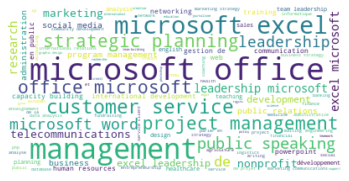

In [79]:
skill_wordcloud = WordCloud(background_color="white", 
                              max_words=100, 
                             ).generate(skill_string)

# view the wordcloud
plt.imshow(skill_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [80]:
import re

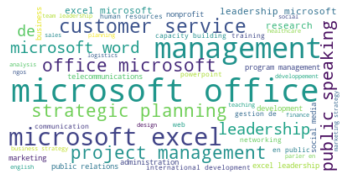

In [138]:
skill_wordcloud = WordCloud(background_color="white", 
                              max_words=50, 
                             ).generate(skill_string)

# view the wordcloud
plt.imshow(skill_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## basic exploratory in the education dataset

In [139]:
education_df

,profile,ed_name,ed_deg,ed_dates
0,https://www.linkedin.com/in/joseph-melior-3a4a...,Law,bachelor's degree,NaN
1,https://www.linkedin.com/in/joseph-melior-3a4a...,Sociologie,licentiate degree,NaN
2,https://www.linkedin.com/in/alexandre-michel-0...,Sciences de la Communication et des relations ...,licence,NaN
3,https://www.linkedin.com/in/biento-jacques-871...,Photography,diplome,NaN
4,https://www.linkedin.com/in/biento-jacques-871...,Broadcast Journalism,bachelor's degree,NaN
5,https://www.linkedin.com/in/valery-fils-aime-6...,Project Management,msc project managment,NaN
6,https://www.linkedin.com/in/valery-fils-aime-6...,Gestion des PME,gestion des affaires,NaN
7,https://www.linkedin.com/in/valery-fils-aime-6...,"Administration et gestion des affaires, général",certificat de formateur et consultant en strat...,NaN
8,https://www.linkedin.com/in/mboute/,Life,experience,NaN
9,https://www.linkedin.com/in/maxglyron/,Research and Development Management,certification universitaire,NaN


In [140]:
education_df.drop('ed_dates', axis = 1, inplace = True)

In [141]:
edu = education_df.dropna()

In [143]:
edu.reset_index(inplace = True)

In [145]:
edu.drop('index', axis = 1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [148]:
#Creating column to identify degree earned 

# Function to identify degree
def degree(x):
    if x.lower().find('master') != -1 or x.lower().find('ms') != -1 or x.lower().find('m.s') != -1 or x.lower().find('mba') != -1 or x.lower().find('m d') != -1:
        return(1)
    if x.lower().find('phd') != -1 or x.lower().find('p.hd') != -1 or x.lower().find('ph.d.') != -1 or x.lower().find('ph.d') != -1:
        return(2)
    if x.lower().find('bachelor') != -1 or x.lower().find('ba') != -1 or x.lower().find('bs') != -1 or x.lower().find('b.a') != -1 or x.lower().find('b.s') != -1 or x.lower().find('licence') != -1 or x.lower().find('licentiate') != -1:
        return(3)
    else:
        return(0)

    
# Create degree column
edu['deg'] = list(map(degree, edu['ed_deg']))

edu

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,profile,ed_name,ed_deg,deg
0,https://www.linkedin.com/in/joseph-melior-3a4a...,Law,bachelor's degree,3
1,https://www.linkedin.com/in/joseph-melior-3a4a...,Sociologie,licentiate degree,3
2,https://www.linkedin.com/in/alexandre-michel-0...,Sciences de la Communication et des relations ...,licence,3
3,https://www.linkedin.com/in/biento-jacques-871...,Photography,diplome,0
4,https://www.linkedin.com/in/biento-jacques-871...,Broadcast Journalism,bachelor's degree,3
5,https://www.linkedin.com/in/valery-fils-aime-6...,Project Management,msc project managment,1
6,https://www.linkedin.com/in/valery-fils-aime-6...,Gestion des PME,gestion des affaires,0
7,https://www.linkedin.com/in/valery-fils-aime-6...,"Administration et gestion des affaires, général",certificat de formateur et consultant en strat...,0
8,https://www.linkedin.com/in/mboute/,Life,experience,0
9,https://www.linkedin.com/in/maxglyron/,Research and Development Management,certification universitaire,0


In [149]:
eduf = edu.groupby('profile').first()
eduf

,ed_name,ed_deg,deg
profile,,,
https://www.linkedin.com/in/abdel-abellard-00760129/,Sustainable Development and Conservation Biolo...,master's degree,1
https://www.linkedin.com/in/abimaelle-chery-95756419b/,Diplomatie,diplome en cours,0
https://www.linkedin.com/in/abischamma-grand-jean-75b145122/,"Affaires / gestion, général",licence,3
https://www.linkedin.com/in/achille-pierre-fils-2a47693a/,Business Administration,master's degree,1
https://www.linkedin.com/in/adelin-pierre-b5b94255/,"Geographie, Environnement et Amenagement du Te...",environnement et amenagement du terrioire,0
https://www.linkedin.com/in/adler-barreau-a63331133/,Industrial Engineering,bachelor's degree,3
https://www.linkedin.com/in/alainduret/,Human Resources management,bachelor,3
https://www.linkedin.com/in/alandy-blaise-5a2601137/,Sociologie-Travail Social,euf,0
https://www.linkedin.com/in/alberson-clervil-24962419a/,sciences humaines et sociales,4eme annee degre licence,3


In [150]:
eduf['deg'].value_counts(normalize=True) * 100

0    41.080402
3    37.185930
1    20.979899
2     0.753769
Name: deg, dtype: float64

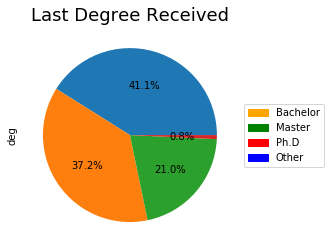

In [157]:
import matplotlib.patches as mpatches
pie = eduf['deg'].value_counts().plot(kind="pie", autopct='%1.1f%%', labels=None)

pie.set_title("Last Degree Received", fontsize=18)
Other = mpatches.Patch(color='blue', label='Other')
Bachelor = mpatches.Patch(color='orange', label='Bachelor')
Master = mpatches.Patch(color='green', label='Master')
PhD = mpatches.Patch(color='red', label='Ph.D')
plt.legend(handles=[Bachelor,Master,PhD,Other], loc='center left', bbox_to_anchor=(1, 0.5))

## I have a lot of cleaning to do , i was suppose to do it before the basic exploratory 